In [10]:
import pandas as pd
import os
import reportlab
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    StackingClassifier,
    VotingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn_evaluation import plot

In [3]:
df = pd.read_excel("../artifacts/data/Telco_customer_churn.xlsx")

In [4]:
categorical_features = [
                'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines',
                'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
                'Streaming TV', 'Streaming Movies', 'Contract','Paperless Billing', 'Payment Method', 'Churn Value'
            ]

dummy_cat_features = [
                'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines',
                'Internet Service','Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 
                'Streaming TV', 'Streaming Movies', 'Contract','Paperless Billing', 'Payment Method'
            ]

drop_features = [
                'CustomerID', 'Lat Long', 'Churn Reason', 'Country', 'State',
                'City', 'Zip Code', 'Churn Label', 'Count'
            ]

In [5]:
df = df.drop(drop_features, axis=1)
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
# Dumping all null values
df.dropna(axis=0, inplace=True)
label_enc = LabelEncoder()
for col in categorical_features:
    df[col] = label_enc.fit_transform(df[col])

In [6]:
data_new_f = pd.get_dummies(df, columns=dummy_cat_features, drop_first=True)

In [7]:
data_new_f.head()

,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Gender_1,Senior Citizen_1,...,Streaming TV_1,Streaming TV_2,Streaming Movies_1,Streaming Movies_2,Contract_1,Contract_2,Paperless Billing_1,Payment Method_1,Payment Method_2,Payment Method_3
0,33.964131,-118.272783,2,53.85,108.15,1,86,3239,True,False,...,False,False,False,False,False,False,True,False,False,True
1,34.059281,-118.307420,2,70.70,151.65,1,67,2701,False,False,...,False,False,False,False,False,False,True,False,True,False
2,34.048013,-118.293953,8,99.65,820.50,1,86,5372,False,False,...,False,True,False,True,False,False,True,False,True,False
3,34.062125,-118.315709,28,104.80,3046.05,1,84,5003,False,False,...,False,True,False,True,False,False,True,False,True,False
4,34.039224,-118.266293,49,103.70,5036.30,1,89,5340,True,False,...,False,True,False,True,False,False,True,False,False,False


In [8]:
X = data_new_f.drop(['Churn Value'], axis=1)
Y = data_new_f['Churn Value']
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [9]:
models = {
                # 'Logistic Regression' : LogisticRegression(),
                'Gaussian Naive Bayes' : GaussianNB(),
                'K Nearest Neighbors' : KNeighborsClassifier(),
                # 'Support Vector Machine' : SVC(probability=True),
                'Decision Tree Classifier' : DecisionTreeClassifier(),
                # 'Random Forest Classifier' : RandomForestClassifier(),
                # 'Bagging Classifier' : BaggingClassifier(
                #     base_estimator=RandomForestClassifier()
                # ),
                # 'Gradient Boosting Classifier' : GradientBoostingClassifier(),
                # 'AdaBoost' : AdaBoostClassifier(
                #     base_estimator=DecisionTreeClassifier()
                # ),
                # 'Stacking Classifier' : StackingClassifier(
                #     estimators=[
                #         ('log_reg', LogisticRegression()),
                #         ('random_forest', RandomForestClassifier()),
                #         ('grad_boost', GradientBoostingClassifier())
                #     ]
                # ),
                # 'Voting Classifier' : VotingClassifier(
                #     estimators=[
                #         ('log_reg', LogisticRegression()),
                #         ('random_forest', RandomForestClassifier()),
                #         ('grad_boost', GradientBoostingClassifier())
                #     ]
                # ),
                # 'XgBoost' : XGBClassifier(),
                # 'LightGBM' : LGBMClassifier(
                #     scale_pos_weight =3,
                #     random_state=42,
                #     objective = 'binary'
                # ),
                # 'CatBoost' : CatBoostClassifier()
            }



            # Dictionary containing all the parameters for all models
            # Hyperparameter Tuning
params = {
                # 'Logistic Regression' : {
                #     'penalty' : ['l2', 'elasticnet'],
                #     'C' : [0.1, 1, 10],
                #     'max_iter' : [100, 1000, 10000]
                # },
                'Gaussian Naive Bayes' : {}, # No hyperparameters to tune
                'K Nearest Neighbors' : {
                    'n_neighbors' : [1, 5, 10],
                    'weights' : ['uniform', 'distance']
                },
                # 'Support Vector Machine' : {
                #     'C' : [0.1, 1],
                #     'kernel' : ['rbf'],
                #     'gamma' : [0.1]
                # },
                'Decision Tree Classifier' : {
                    'criterion' : ['gini', 'log_loss'],
                    'max_depth' : [None, 10, 100]
                },
                # 'Random Forest Classifier' : {
                #     'criterion' : ['gini', 'log_loss'],
                #     'max_depth' : [None, 10, 100],
                #     'n_estimators' : [100, 200, 300]
                # },
                # 'Bagging Classifier' : {
                #     'n_estimators' : [10, 20, 30, 100]
                # },
                # 'Gradient Boosting Classifier' : {
                #     'learning_rate' : [0.1, 1],
                #     'n_estimators' : [100, 200, 300]
                # },
                # 'AdaBoost' : {
                #     'n_estimators' : [50, 100, 200, 300]
                # },
                # 'Stacking Classifier' : {}, # No hyperparameter to tune
                # 'Voting Classifier' : {}, # No hyperparameter to tune
                # 'XgBoost' : {},
                # 'LightGBM' : {
                #     'learning_rate' : [0.1, 0.01],
                #     'max_depth' : [-5, -10, -20] 
                # },
                # 'CatBoost' : {
                #     'depth' : [6, 8, 10],
                #     'learning_rate' : [0.01, 0.05, 0.1],
                #     'iterations' : [30, 50, 100]
                # }

            }

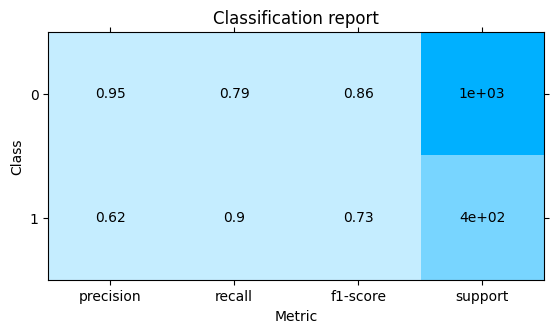

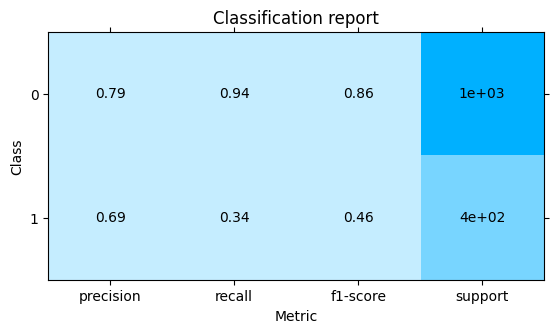

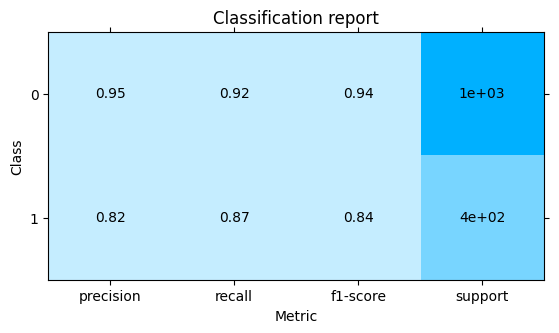

In [13]:
accuracies = {}
classification_reports = {}
labels = ['0', '1']
for model_name, model in models.items():
    if model_name in params:
        hyper_parameters = params[model_name]
        grid_search = GridSearchCV(model, hyper_parameters, cv=5)
        grid_search.fit(X_train, Y_train)
        best_model = grid_search.best_estimator_
        Y_pred = best_model.predict(X_val)
        accuracy = accuracy_score(Y_val, Y_pred)
        class_report = classification_report(Y_val, Y_pred)
        accuracies[model_name] = accuracy
        classification_reports[model_name] = class_report
        report_plot = plot.ClassificationReport.from_raw_data(Y_val, Y_pred, target_names=labels)
        report_plot


